In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/wysa-assignment/ML Assignment Dataset.xlsx


In [2]:
import pandas as pd

excel_file_path = '/kaggle/input/wysa-assignment/ML Assignment Dataset.xlsx'

excel_data = pd.ExcelFile(excel_file_path)

sheet_names = excel_data.sheet_names

print("Sheet Names:", sheet_names)

train_df = excel_data.parse('Train')

Sheet Names: ['Dataset Card', 'Train', 'Test']


In [3]:
train_df

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion
...,...,...,...
8584,Ipad everywhere. #SXSW {link},iPad,Positive emotion
8585,"Wave, buzz... RT @mention We interrupt your re...",NaN,No emotion toward brand or product
8586,"Google's Zeiger, a physician never reported po...",NaN,No emotion toward brand or product
8587,Some Verizon iPhone customers complained their...,NaN,No emotion toward brand or product


In [4]:
train_df = train_df.dropna(subset=['tweet_text'])
train_df

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion
...,...,...,...
8584,Ipad everywhere. #SXSW {link},iPad,Positive emotion
8585,"Wave, buzz... RT @mention We interrupt your re...",NaN,No emotion toward brand or product
8586,"Google's Zeiger, a physician never reported po...",NaN,No emotion toward brand or product
8587,Some Verizon iPhone customers complained their...,NaN,No emotion toward brand or product


In [5]:
train_df['emotion_in_tweet_is_directed_at'].value_counts()

emotion_in_tweet_is_directed_at
iPad                               946
Apple                              661
iPad or iPhone App                 470
Google                             430
iPhone                             297
Other Google product or service    293
Android App                         81
Android                             78
Other Apple product or service      35
Name: count, dtype: int64

In [6]:
train_df['emotion_in_tweet_is_directed_at'].isnull().sum()

5297

In [7]:
train_df['emotion_in_tweet_is_directed_at'].fillna(value='Nothing', inplace=True)
train_df['emotion_in_tweet_is_directed_at'].value_counts()

/tmp/ipykernel_395/2264699028.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['emotion_in_tweet_is_directed_at'].fillna(value='Nothing', inplace=True)


emotion_in_tweet_is_directed_at
Nothing                            5297
iPad                                946
Apple                               661
iPad or iPhone App                  470
Google                              430
iPhone                              297
Other Google product or service     293
Android App                          81
Android                              78
Other Apple product or service       35
Name: count, dtype: int64

In [8]:
train_df['emotion_in_tweet_is_directed_at']

0                   iPhone
1       iPad or iPhone App
2                     iPad
3       iPad or iPhone App
4                   Google
               ...        
8584                  iPad
8585               Nothing
8586               Nothing
8587               Nothing
8588               Nothing
Name: emotion_in_tweet_is_directed_at, Length: 8588, dtype: object

In [9]:
train_df_encoded = pd.get_dummies(train_df, columns=['emotion_in_tweet_is_directed_at'], prefix='', prefix_sep='')
train_df_encoded

,tweet_text,is_there_an_emotion_directed_at_a_brand_or_product,Android,Android App,Apple,Google,Nothing,Other Apple product or service,Other Google product or service,iPad,iPad or iPhone App,iPhone
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,Negative emotion,False,False,False,False,False,False,False,False,False,True
1,@jessedee Know about @fludapp ? Awesome iPad/i...,Positive emotion,False,False,False,False,False,False,False,False,True,False
2,@swonderlin Can not wait for #iPad 2 also. The...,Positive emotion,False,False,False,False,False,False,False,True,False,False
3,@sxsw I hope this year's festival isn't as cra...,Negative emotion,False,False,False,False,False,False,False,False,True,False
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Positive emotion,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8584,Ipad everywhere. #SXSW {link},Positive emotion,False,False,False,False,False,False,False,True,False,False
8585,"Wave, buzz... RT @mention We interrupt your re...",No emotion toward brand or product,False,False,False,False,True,False,False,False,False,False
8586,"Google's Zeiger, a physician never reported po...",No emotion toward brand or product,False,False,False,False,True,False,False,False,False,False
8587,Some Verizon iPhone customers complained their...,No emotion toward brand or product,False,False,False,False,True,False,False,False,False,False


In [10]:
train_df.isnull().sum()

tweet_text                                            0
emotion_in_tweet_is_directed_at                       0
is_there_an_emotion_directed_at_a_brand_or_product    0
dtype: int64

In [11]:
train_df['is_there_an_emotion_directed_at_a_brand_or_product'].value_counts()

is_there_an_emotion_directed_at_a_brand_or_product
No emotion toward brand or product    5388
Positive emotion                      2672
Negative emotion                       519
I can't tell                             9
Name: count, dtype: int64

In [12]:
df_flaws = pd.get_dummies(train_df_encoded, columns=['is_there_an_emotion_directed_at_a_brand_or_product'], prefix='', prefix_sep='')

In [13]:
df_flaws.replace({True: 1, False: 0}, inplace=True)

In [14]:
df_flaws

,tweet_text,Android,Android App,Apple,Google,Nothing,Other Apple product or service,Other Google product or service,iPad,iPad or iPhone App,iPhone,I can't tell,Negative emotion,No emotion toward brand or product,Positive emotion
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1,@jessedee Know about @fludapp ? Awesome iPad/i...,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,@swonderlin Can not wait for #iPad 2 also. The...,0,0,0,0,0,0,0,1,0,0,0,0,0,1
3,@sxsw I hope this year's festival isn't as cra...,0,0,0,0,0,0,0,0,1,0,0,1,0,0
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,0,0,0,1,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8584,Ipad everywhere. #SXSW {link},0,0,0,0,0,0,0,1,0,0,0,0,0,1
8585,"Wave, buzz... RT @mention We interrupt your re...",0,0,0,0,1,0,0,0,0,0,0,0,1,0
8586,"Google's Zeiger, a physician never reported po...",0,0,0,0,1,0,0,0,0,0,0,0,1,0
8587,Some Verizon iPhone customers complained their...,0,0,0,0,1,0,0,0,0,0,0,0,1,0


In [15]:
import re

def clean_text(text):
    cleaned_text = re.sub(r'[^\w\s]', '', text)
    return cleaned_text

df_flaws['tweet_text_cleaned'] = df_flaws['tweet_text'].apply(clean_text)

In [16]:
df_flaws.drop("tweet_text",axis=1,inplace=True)

In [17]:
df_flaws

,Android,Android App,Apple,Google,Nothing,Other Apple product or service,Other Google product or service,iPad,iPad or iPhone App,iPhone,I can't tell,Negative emotion,No emotion toward brand or product,Positive emotion,tweet_text_cleaned
0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,wesley83 I have a 3G iPhone After 3 hrs tweeti...
1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,jessedee Know about fludapp Awesome iPadiPhon...
2,0,0,0,0,0,0,0,1,0,0,0,0,0,1,swonderlin Can not wait for iPad 2 also They s...
3,0,0,0,0,0,0,0,0,1,0,0,1,0,0,sxsw I hope this years festival isnt as crashy...
4,0,0,0,1,0,0,0,0,0,0,0,0,0,1,sxtxstate great stuff on Fri SXSW Marissa Maye...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8584,0,0,0,0,0,0,0,1,0,0,0,0,0,1,Ipad everywhere SXSW link
8585,0,0,0,0,1,0,0,0,0,0,0,0,1,0,Wave buzz RT mention We interrupt your regular...
8586,0,0,0,0,1,0,0,0,0,0,0,0,1,0,Googles Zeiger a physician never reported pote...
8587,0,0,0,0,1,0,0,0,0,0,0,0,1,0,Some Verizon iPhone customers complained their...


In [18]:
df_flaws.to_csv("processed_train.csv", index=False)

In [19]:
import os
import collections
import pandas as pd
import numpy as np
import transformers
import torch
from torch.utils.data import Dataset, DataLoader, RandomSampler, SequentialSampler
from transformers import BertTokenizer, AutoTokenizer, BertModel, BertConfig, AutoModel, AdamW

In [20]:
df_train = pd.read_csv("/kaggle/working/processed_train.csv")

In [21]:
df_train

,Android,Android App,Apple,Google,Nothing,Other Apple product or service,Other Google product or service,iPad,iPad or iPhone App,iPhone,I can't tell,Negative emotion,No emotion toward brand or product,Positive emotion,tweet_text_cleaned
0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,wesley83 I have a 3G iPhone After 3 hrs tweeti...
1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,jessedee Know about fludapp Awesome iPadiPhon...
2,0,0,0,0,0,0,0,1,0,0,0,0,0,1,swonderlin Can not wait for iPad 2 also They s...
3,0,0,0,0,0,0,0,0,1,0,0,1,0,0,sxsw I hope this years festival isnt as crashy...
4,0,0,0,1,0,0,0,0,0,0,0,0,0,1,sxtxstate great stuff on Fri SXSW Marissa Maye...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8583,0,0,0,0,0,0,0,1,0,0,0,0,0,1,Ipad everywhere SXSW link
8584,0,0,0,0,1,0,0,0,0,0,0,0,1,0,Wave buzz RT mention We interrupt your regular...
8585,0,0,0,0,1,0,0,0,0,0,0,0,1,0,Googles Zeiger a physician never reported pote...
8586,0,0,0,0,1,0,0,0,0,0,0,0,1,0,Some Verizon iPhone customers complained their...


In [22]:
from sklearn.model_selection import train_test_split

train_df, dev_df = train_test_split(df_train, test_size=0.2, random_state=42)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [23]:
print(train_df.shape)
print(dev_df.shape)

(6870, 15)
(1718, 15)


In [24]:
max_length = 0

for text in df_train['tweet_text_cleaned']:
    current_length = len(text)
    if current_length > max_length:
        max_length = current_length

In [25]:
max_length

155

In [26]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [27]:
MAX_LEN = 200
TRAIN_BATCH_SIZE = 64
VALID_BATCH_SIZE = 64
EPOCHS = 10
LEARNING_RATE = 2e-5
tokenizer = AutoTokenizer.from_pretrained('roberta-base')

In [28]:
target_cols = [col for col in df_train.columns if col not in ['tweet_text_cleaned']]
target_cols

['Android',
 'Android App',
 'Apple',
 'Google',
 'Nothing',
 'Other Apple product or service',
 'Other Google product or service',
 'iPad',
 'iPad or iPhone App',
 'iPhone',
 "I can't tell",
 'Negative emotion',
 'No emotion toward brand or product',
 'Positive emotion']

In [29]:
df_train = train_df.reset_index(drop=True)
df_dev = dev_df.reset_index(drop=True)

In [30]:
df_train[target_cols].values

array([[0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 0]])

In [31]:
class BERTDataset(Dataset):
    def __init__(self, df, tokenizer, max_len):
        self.df = df
        self.max_len = max_len
        self.text = df.tweet_text_cleaned
        self.tokenizer = tokenizer
        self.targets = df[target_cols].values
        
    def __len__(self):
        return len(self.df)
    
    def __getitem__(self, index):
        text = self.text[index]
        inputs = self.tokenizer.encode_plus(
            text,
            truncation=True,
            add_special_tokens=True,
            max_length=self.max_len,
            padding='max_length',
            return_token_type_ids=True
        )
        ids = inputs['input_ids']
        mask = inputs['attention_mask']
        token_type_ids = inputs["token_type_ids"]
        
        return {
            'ids': torch.tensor(ids, dtype=torch.long),
            'mask': torch.tensor(mask, dtype=torch.long),
            'token_type_ids': torch.tensor(token_type_ids, dtype=torch.long),
            'targets': torch.tensor(self.targets[index], dtype=torch.float)
        }

In [32]:
train_dataset = BERTDataset(df_train, tokenizer, MAX_LEN)
valid_dataset = BERTDataset(df_dev, tokenizer, MAX_LEN)

In [33]:
train_loader = DataLoader(train_dataset, batch_size=TRAIN_BATCH_SIZE, 
                          num_workers=4, shuffle=True, pin_memory=True)
valid_loader = DataLoader(valid_dataset, batch_size=VALID_BATCH_SIZE, 
                          num_workers=4, shuffle=False, pin_memory=True)

In [34]:
class BERTClass(torch.nn.Module):
    def __init__(self):
        super(BERTClass, self).__init__()
        self.roberta = AutoModel.from_pretrained('roberta-base')
        self.l2 = torch.nn.Dropout(0.3)
        self.fc = torch.nn.Linear(768,14)
    
    def forward(self, ids, mask, token_type_ids):
        _, features = self.roberta(ids, attention_mask = mask, token_type_ids = token_type_ids, return_dict=False)
        output_2 = self.l2(features)
        output = self.fc(output_2)
        return output

model = BERTClass()
model.to(device);

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-base and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [35]:
def loss_fn(outputs, targets):
    return torch.nn.BCEWithLogitsLoss()(outputs, targets)

In [36]:
optimizer = AdamW(params =  model.parameters(), lr=LEARNING_RATE, weight_decay=1e-6)


/opt/conda/lib/python3.10/site-packages/transformers/optimization.py:429: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [37]:
device

device(type='cuda')

In [38]:
def train(epoch):
    model.train()
    for _,data in enumerate(train_loader, 0):
        ids = data['ids'].to(device, dtype = torch.long)
        mask = data['mask'].to(device, dtype = torch.long)
        token_type_ids = data['token_type_ids'].to(device, dtype = torch.long)
        targets = data['targets'].to(device, dtype = torch.float)

        outputs = model(ids, mask, token_type_ids)

        loss = loss_fn(outputs, targets)
        if _%500 == 0:
            print(f'Epoch: {epoch}, Loss:  {loss.item()}')
        
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

In [40]:
for epoch in range(EPOCHS):
    train(epoch)

Epoch: 0, Loss:  0.674621045589447
Epoch: 1, Loss:  0.2742188572883606
Epoch: 2, Loss:  0.19863051176071167
Epoch: 3, Loss:  0.18816687166690826
Epoch: 4, Loss:  0.1580183058977127
Epoch: 5, Loss:  0.09997209906578064
Epoch: 6, Loss:  0.09799807518720627
Epoch: 7, Loss:  0.08938564360141754
Epoch: 8, Loss:  0.07250222563743591
Epoch: 9, Loss:  0.07845715433359146


In [41]:
def validation():
    model.eval()
    fin_targets=[]
    fin_outputs=[]
    with torch.no_grad():
        for _, data in enumerate(valid_loader, 0):
            ids = data['ids'].to(device, dtype = torch.long)
            mask = data['mask'].to(device, dtype = torch.long)
            token_type_ids = data['token_type_ids'].to(device, dtype = torch.long)
            targets = data['targets'].to(device, dtype = torch.float)
            outputs = model(ids, mask, token_type_ids)
            fin_targets.extend(targets.cpu().detach().numpy().tolist())
            fin_outputs.extend(torch.sigmoid(outputs).cpu().detach().numpy().tolist())
    return fin_outputs, fin_targets

In [43]:
from sklearn import metrics

outputs, targets = validation()
outputs = np.array(outputs) >= 0.5
accuracy = metrics.accuracy_score(targets, outputs)
f1_score_micro = metrics.f1_score(targets, outputs, average='micro')
f1_score_macro = metrics.f1_score(targets, outputs, average='macro')
print(f"Accuracy Score = {accuracy}")
print(f"F1 Score (Micro) = {f1_score_micro}")
print(f"F1 Score (Macro) = {f1_score_macro}")

Accuracy Score = 0.680442374854482
F1 Score (Micro) = 0.7368886269888039
F1 Score (Macro) = 0.5179875162907291


In [44]:
torch.save(model.state_dict(), 'model.bin')

In [50]:
excel_file_path = '/kaggle/input/wysa-assignment/ML Assignment Dataset.xlsx'
excel_data = pd.ExcelFile(excel_file_path)
sheet_names = excel_data.sheet_names
print("Sheet Names:", sheet_names)
df = excel_data.parse('Train')
df = df.dropna(subset=['tweet_text'])
df['emotion_in_tweet_is_directed_at'].fillna(value='Nothing', inplace=True)

Sheet Names: ['Dataset Card', 'Train', 'Test']


In [52]:
df

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion
...,...,...,...
8584,Ipad everywhere. #SXSW {link},iPad,Positive emotion
8585,"Wave, buzz... RT @mention We interrupt your re...",Nothing,No emotion toward brand or product
8586,"Google's Zeiger, a physician never reported po...",Nothing,No emotion toward brand or product
8587,Some Verizon iPhone customers complained their...,Nothing,No emotion toward brand or product


In [53]:
df['emotion_in_tweet_is_directed_at'].value_counts()

emotion_in_tweet_is_directed_at
Nothing                            5297
iPad                                946
Apple                               661
iPad or iPhone App                  470
Google                              430
iPhone                              297
Other Google product or service     293
Android App                          81
Android                              78
Other Apple product or service       35
Name: count, dtype: int64

In [55]:
df['is_there_an_emotion_directed_at_a_brand_or_product'].value_counts()

is_there_an_emotion_directed_at_a_brand_or_product
No emotion toward brand or product    5388
Positive emotion                      2672
Negative emotion                       519
I can't tell                             9
Name: count, dtype: int64

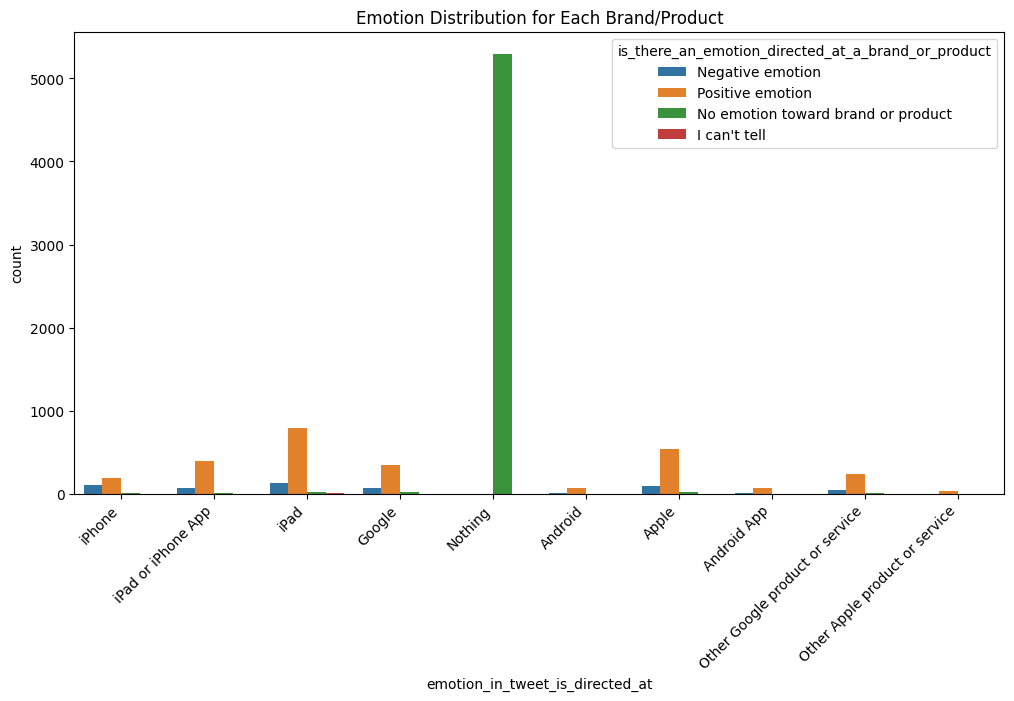

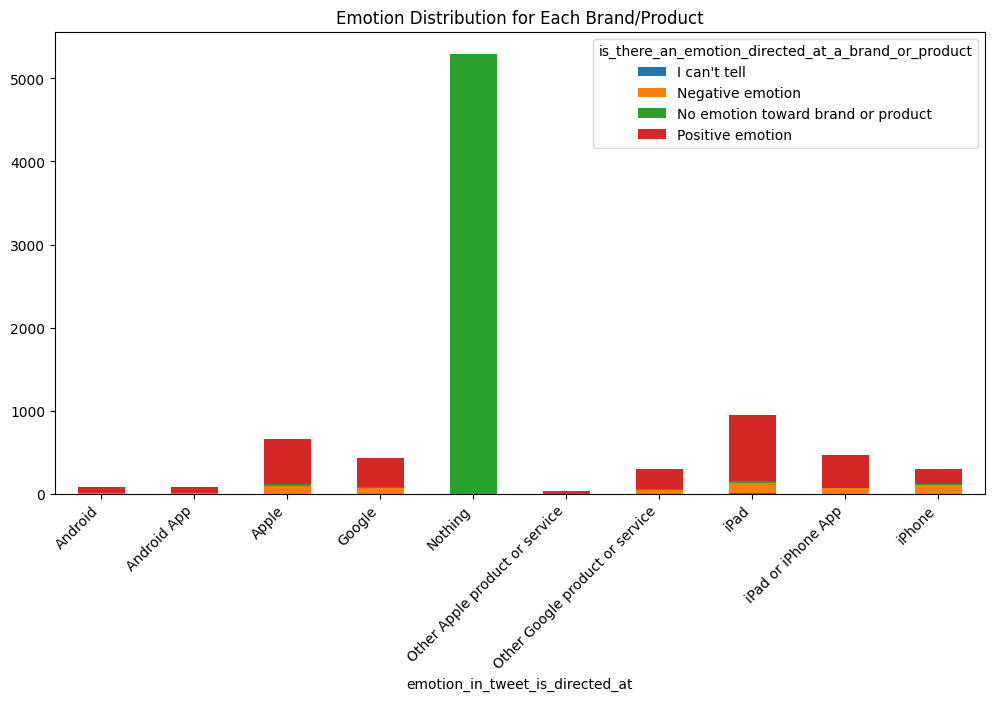

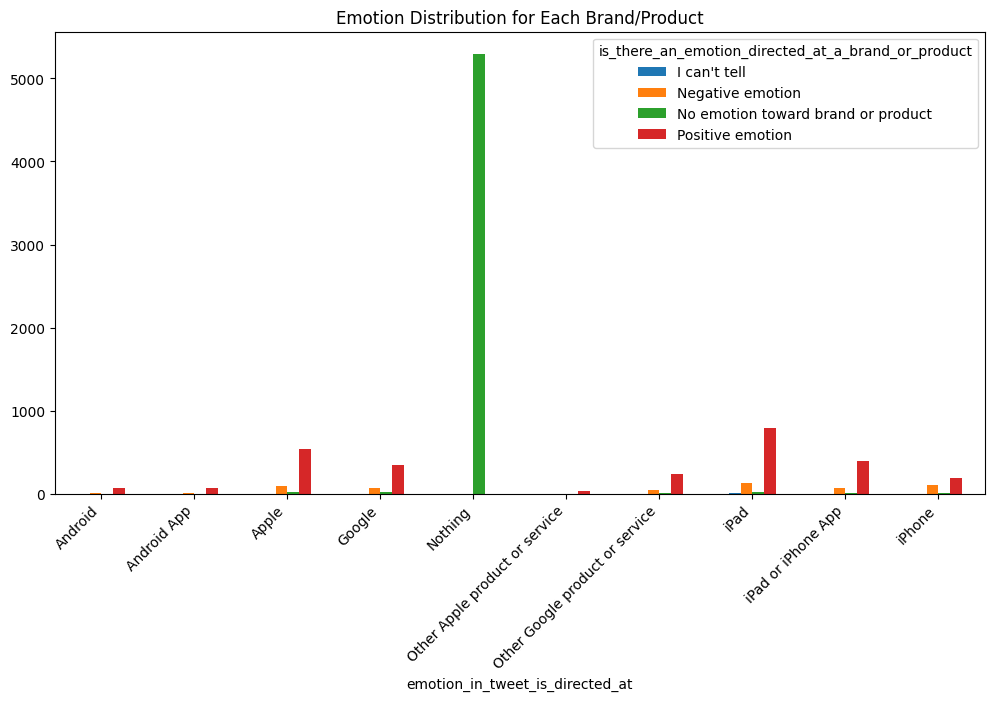

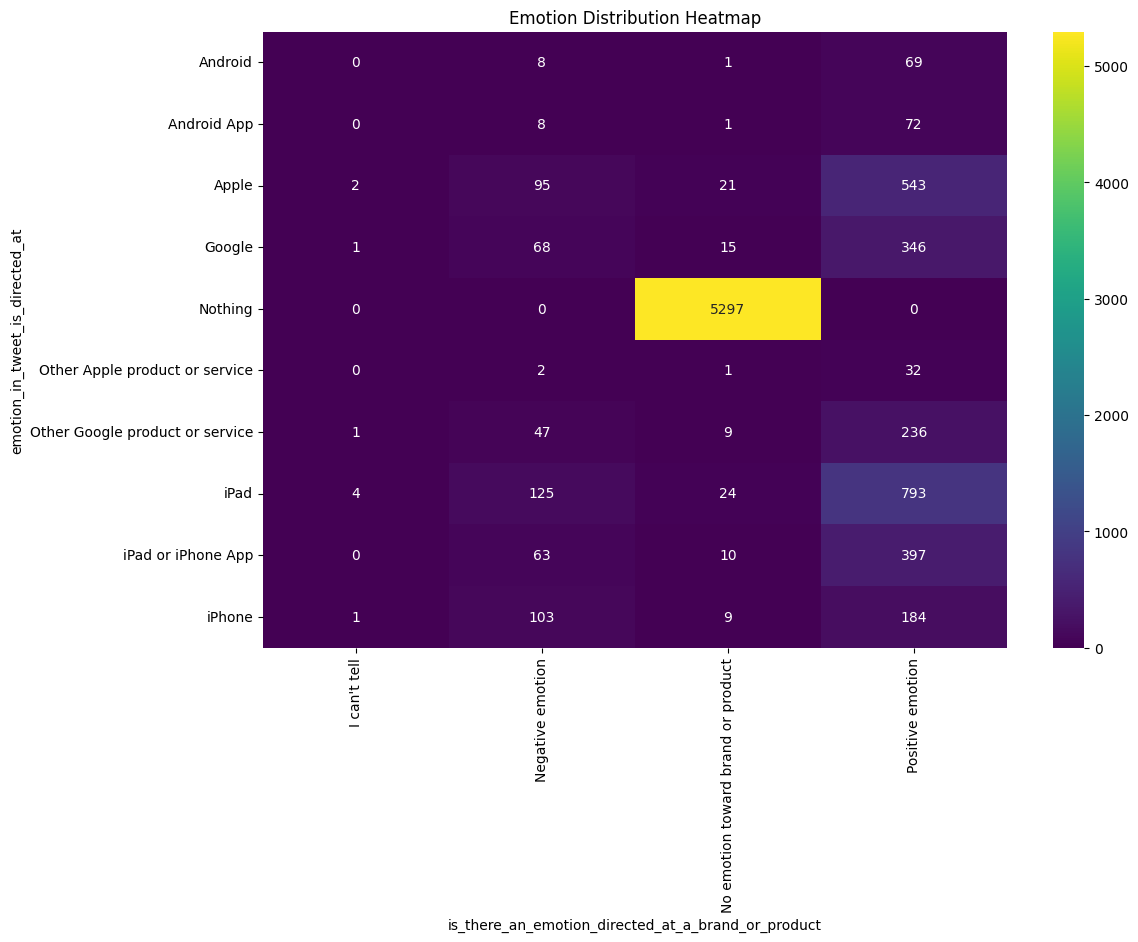

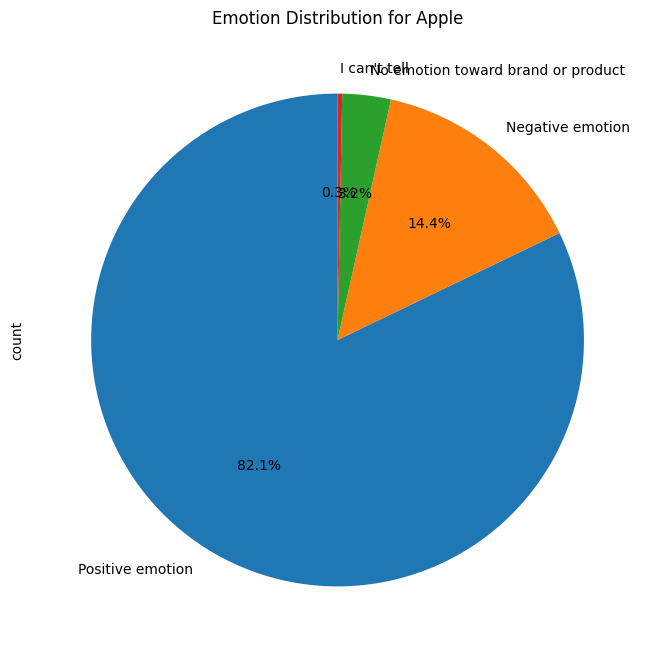

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


# Plot 1: Bar Plot - Emotion Distribution for Each Brand/Product
plt.figure(figsize=(12, 6))
sns.countplot(x='emotion_in_tweet_is_directed_at', hue='is_there_an_emotion_directed_at_a_brand_or_product', data=df)
plt.title('Emotion Distribution for Each Brand/Product')
plt.xticks(rotation=45, ha='right')
plt.show()

# Plot 2: Stacked Bar Plot - Emotion Distribution
df_cross = pd.crosstab(df['emotion_in_tweet_is_directed_at'], df['is_there_an_emotion_directed_at_a_brand_or_product'])
df_cross.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Emotion Distribution for Each Brand/Product')
plt.xticks(rotation=45, ha='right')
plt.show()

# Plot 3: Grouped Bar Plot - Emotion Distribution
df_grouped = df.groupby(['emotion_in_tweet_is_directed_at', 'is_there_an_emotion_directed_at_a_brand_or_product']).size().unstack()
df_grouped.plot(kind='bar', figsize=(12, 6))
plt.title('Emotion Distribution for Each Brand/Product')
plt.xticks(rotation=45, ha='right')
plt.show()

# Plot 4: Heatmap - Emotion Distribution
plt.figure(figsize=(12, 8))
sns.heatmap(df_cross, cmap='viridis', annot=True, fmt='d')
plt.title('Emotion Distribution Heatmap')
plt.show()

# Plot 5: Pie Chart - Emotion Distribution for a Specific Brand/Product
selected_brand = 'Apple'
df_selected_brand = df[df['emotion_in_tweet_is_directed_at'] == selected_brand]
plt.figure(figsize=(8, 8))
df_selected_brand['is_there_an_emotion_directed_at_a_brand_or_product'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title(f'Emotion Distribution for {selected_brand}')
plt.show()

In [57]:
!pip install wordcloud

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


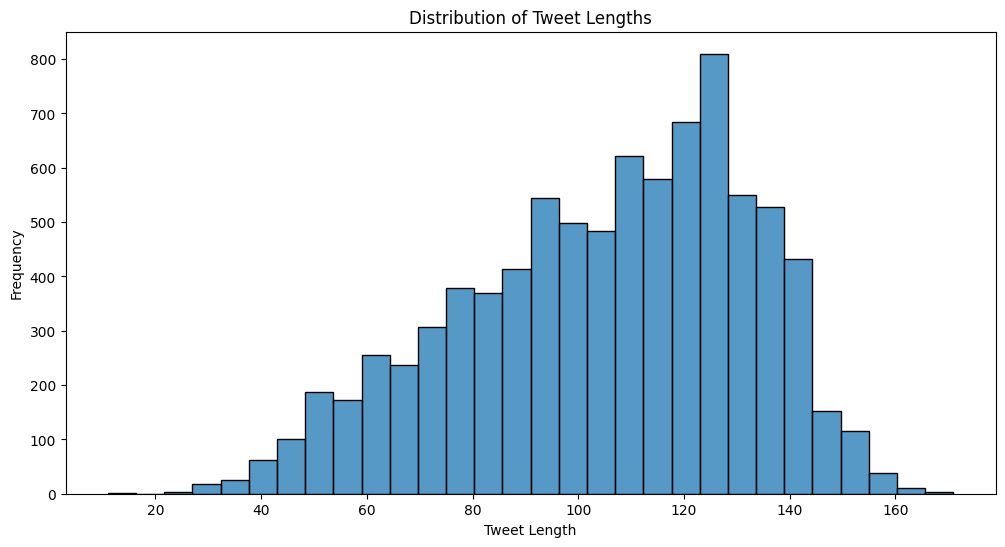

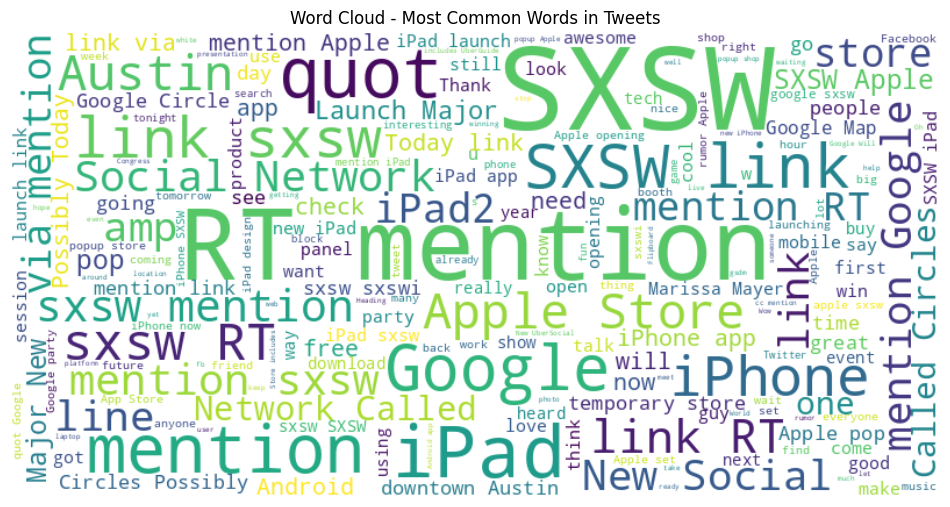

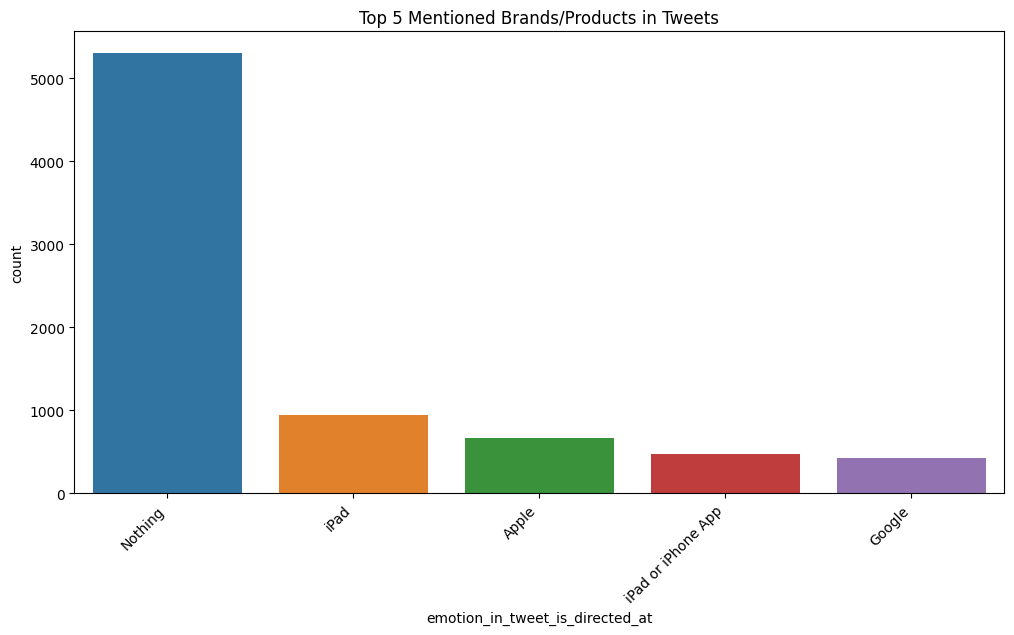

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud


# Plot 1: Distribution of Tweet Lengths
df['tweet_length'] = df['tweet_text'].apply(len)
plt.figure(figsize=(12, 6))
sns.histplot(df['tweet_length'], bins=30, kde=False)
plt.title('Distribution of Tweet Lengths')
plt.xlabel('Tweet Length')
plt.ylabel('Frequency')
plt.show()

# Plot 2: Word Cloud - Most Common Words in Tweets
all_text = ' '.join(df['tweet_text'])
wordcloud = WordCloud(width=800, height=400, random_state=42, max_font_size=100, background_color='white').generate(all_text)
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Most Common Words in Tweets')
plt.show()

# Plot 3: Bar Plot - Top N Mentioned Brands/Products in Tweets
top_n = 5
top_brands = df['emotion_in_tweet_is_directed_at'].value_counts().head(top_n).index
df_top_brands = df[df['emotion_in_tweet_is_directed_at'].isin(top_brands)]

plt.figure(figsize=(12, 6))
sns.countplot(x='emotion_in_tweet_is_directed_at', data=df_top_brands, order=top_brands)
plt.title(f'Top {top_n} Mentioned Brands/Products in Tweets')
plt.xticks(rotation=45, ha='right')
plt.show()


In [60]:
test_df = excel_data.parse('Test')

In [61]:
test_df

,Tweet
0,Hand-Held ���Hobo�۪: Drafthouse launches ���Ho...
1,Again? RT @mention Line at the Apple store is ...
2,Boooo! RT @mention Flipboard is developing an ...
3,Thanks to @mention for publishing the news of ...
4,���@mention &quot;Apple has opened a pop-up st...
...,...
499,Hey is anyone doing #sxsw signing up for the g...
500,@mention you can buy my used iPad and I'll pic...
501,@mention You could buy a new iPad 2 tmrw at th...
502,"Guys, if you ever plan on attending #SXSW, you..."


In [65]:
test_df['tweet_text_cleaned'] = test_df['Tweet'].apply(clean_text)
test_df.drop("Tweet",axis=1,inplace=True)

In [66]:
test_df

,tweet_text_cleaned
0,HandHeld Hobo Drafthouse launches Hobo With a ...
1,Again RT mention Line at the Apple store is in...
2,Boooo RT mention Flipboard is developing an iP...
3,Thanks to mention for publishing the news of m...
4,mention quotApple has opened a popup store in ...
...,...
499,Hey is anyone doing sxsw signing up for the gr...
500,mention you can buy my used iPad and Ill pick ...
501,mention You could buy a new iPad 2 tmrw at the...
502,Guys if you ever plan on attending SXSW you ne...


In [67]:
test_df.isnull().sum()

tweet_text_cleaned    0
dtype: int64

In [70]:
class BERTTestDataset(Dataset):
    def __init__(self, df, tokenizer, max_len):
        self.df = df
        self.max_len = max_len
        self.text = df.tweet_text_cleaned
        self.tokenizer = tokenizer
        
    def __len__(self):
        return len(self.df)
    
    def __getitem__(self, index):
        text = self.text[index]
        inputs = self.tokenizer.encode_plus(
            text,
            truncation=True,
            add_special_tokens=True,
            max_length=self.max_len,
            padding='max_length',
            return_token_type_ids=True
        )
        ids = inputs['input_ids']
        mask = inputs['attention_mask']
        token_type_ids = inputs["token_type_ids"]
        
        return {
            'ids': torch.tensor(ids, dtype=torch.long),
            'mask': torch.tensor(mask, dtype=torch.long),
            'token_type_ids': torch.tensor(token_type_ids, dtype=torch.long)
        }

In [71]:
test_dataset = BERTTestDataset(test_df, tokenizer, MAX_LEN)
test_loader = DataLoader(test_dataset, batch_size=TRAIN_BATCH_SIZE, 
                          num_workers=4, shuffle=True, pin_memory=True)

In [73]:
def testing():
    model.eval()
    fin_outputs=[]
    with torch.no_grad():
        for _, data in enumerate(test_loader, 0):
            ids = data['ids'].to(device, dtype = torch.long)
            mask = data['mask'].to(device, dtype = torch.long)
            token_type_ids = data['token_type_ids'].to(device, dtype = torch.long)
            outputs = model(ids, mask, token_type_ids)
            fin_outputs.extend(torch.sigmoid(outputs).cpu().detach().numpy().tolist())
    return fin_outputs

In [78]:
outputs = testing()
outputs = np.array(outputs) >= 0.5
outputs = outputs.astype(int)

In [79]:
outputs

array([[0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 1],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 1, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 1, 0]])